In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")

In [4]:
df = pd.read_csv('../data/clean_data.csv')

In [5]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
371,16.0,3.7,39,24.5,18,SP98,0,0,0
372,16.1,4.3,38,25.0,31,SP98,1,0,0
373,16.0,3.8,45,25.0,19,SP98,0,0,0
374,15.4,4.6,42,25.0,31,SP98,1,0,0


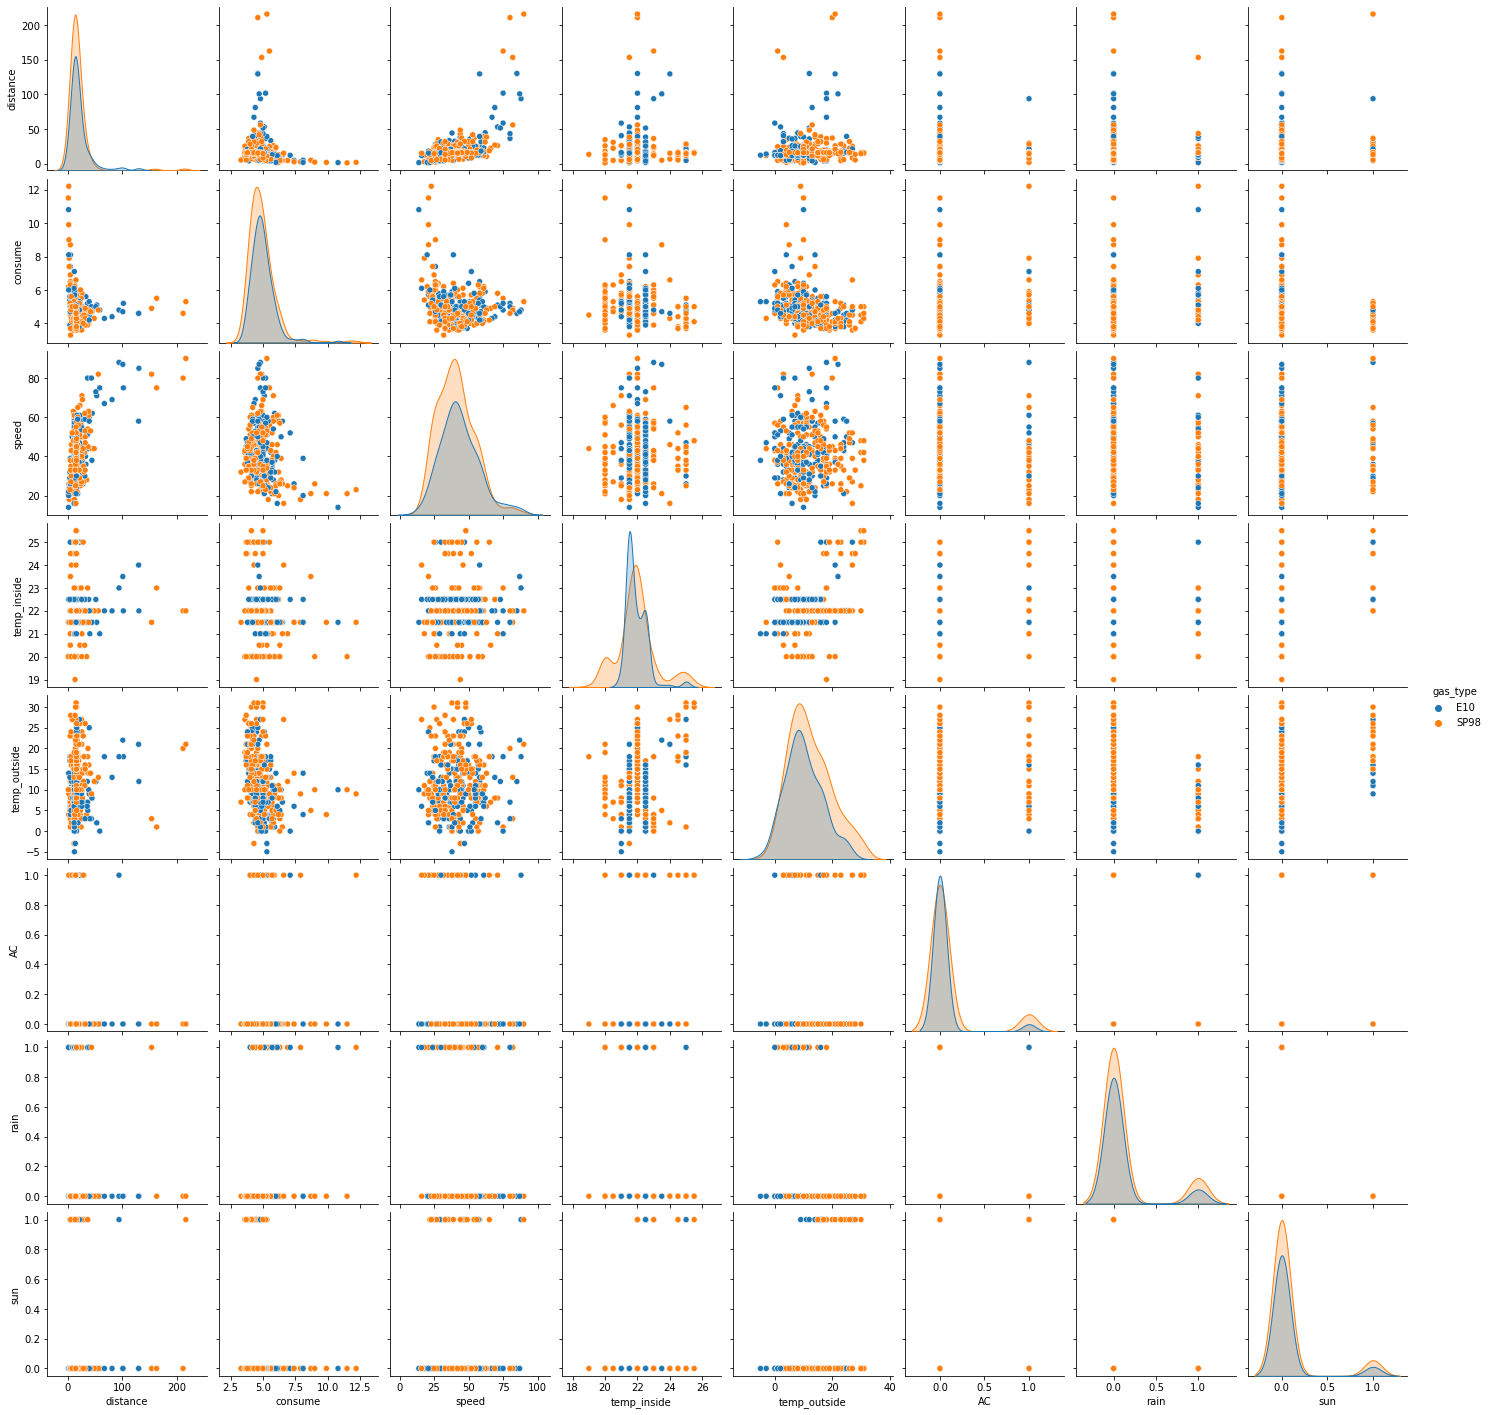

In [6]:
sns.pairplot(df, hue="gas_type")

/home/sergio/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


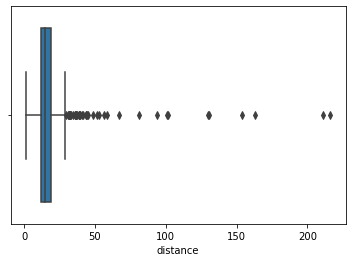

In [7]:
sns.boxplot(df.distance)

In [8]:
df.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,-0.027670,-0.022129,0.078627
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,0.093892,0.247699,-0.169173
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,-0.036351,-0.002936,0.077181
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,0.169374,-0.185731,0.349988
AC,-0.027670,0.093892,-0.036351,0.297775,0.169374,1.000000,0.244848,0.090164
rain,-0.022129,0.247699,-0.002936,-0.037356,-0.185731,0.244848,1.000000,-0.113298
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,0.090164,-0.113298,1.000000


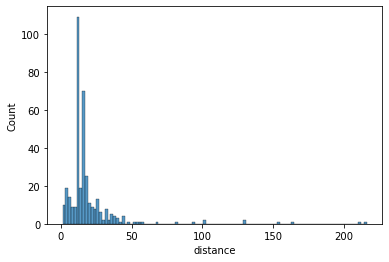

In [10]:
sns.histplot(x=df.distance)

In [11]:
df_a = df[df.distance<=50].reset_index(drop=True)

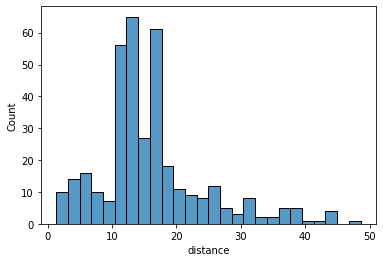

In [12]:
sns.histplot(x=df_a.distance)

# Feature engineering

In [20]:
df_a['gasoline'] = df_a.gas_type.apply(lambda x: 0 if x =='E10' else 1)

In [21]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
df_list = [df_a[df_a.gasoline == 0], df_a[df_a.gasoline == 1]]

In [22]:
df_gas = df_a.copy()
X = df_gas[['distance','speed','temp_outside','AC','rain','sun','gasoline']]
y = df_gas['consume']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                y, 
                                                test_size=0.15, 
                                                random_state=46)    

In [23]:
gb = GradientBoostingRegressor()

parameter_space = {'learning_rate': [0.01, 0.001],
                   'n_estimators': [3000,5000, 7000],
               'max_features': [1,0.5],
               'max_depth': [2,3,5],
               'min_samples_leaf': [10,15]}

grid_search = GridSearchCV(gb,
                   param_grid=parameter_space,
                   verbose=1,
                    n_jobs= -1,
                   cv=5)

grid_search.fit(X_train, y_train)

gb_best = grid_search.best_estimator_
y_predict_test = gb_best.predict(X_test) 

score = mean_squared_error(y_test, y_predict_test)

params = (grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   51.4s finished


In [24]:
score

0.1582434263233483

In [25]:
params

{'learning_rate': 0.001,
 'max_depth': 5,
 'max_features': 0.5,
 'min_samples_leaf': 10,
 'n_estimators': 5000}

In [26]:
gb_best.fit(X,y)

GradientBoostingRegressor(learning_rate=0.001, max_depth=5, max_features=0.5,
                          min_samples_leaf=10, n_estimators=5000)

# Experiment

In [27]:
import random

In [31]:
tmp_list = []

for _ in range(10000):
    
    distance = round(random.uniform(1, 50),1)
    speed = round(random.uniform(14, 90),1)
    temp_outside = round(random.uniform(-5, 40),1)
    ac = random.choice([0,1])
    rain = random.choice([0,1])
    sun = random.choice([0,1])
    gasoline = random.choice([0,1])
    
    
    tmp_list.append([distance, speed, temp_outside, ac, rain, sun])

df_exp = pd.DataFrame(tmp_list, columns = X_train.columns[:-1] )

In [39]:
df_exp.loc[:,:'sun']

,distance,speed,temp_outside,AC,rain,sun
0,39.4,67.1,9.9,0,0,0
1,14.3,37.9,3.0,1,1,1
2,22.8,73.1,25.3,1,0,0
3,37.9,79.8,-4.0,1,0,1
4,12.6,71.7,1.8,0,1,0
...,...,...,...,...,...,...
9995,32.3,89.7,27.6,1,1,0
9996,20.1,68.1,16.0,0,1,1
9997,44.8,31.4,39.0,0,1,1
9998,13.8,66.5,10.3,1,1,1


In [40]:
X_exp = df_exp.loc[:,:'sun']
X_exp['gasoline'] = 0
df_exp['E10_consum_pred'] = gb_best.predict(X_exp)
X_exp = df_exp.loc[:,:'sun']
X_exp['gasoline'] = 1
df_exp['SP98_consum_pred'] = gb_best.predict(X_exp)

In [41]:
df_exp

,distance,speed,temp_outside,AC,rain,sun,E10_consum_pred,SP98_consum_pred
0,39.4,67.1,9.9,0,0,0,4.836615,4.819579
1,14.3,37.9,3.0,1,1,1,5.388400,5.329854
2,22.8,73.1,25.3,1,0,0,4.489509,4.477336
3,37.9,79.8,-4.0,1,0,1,4.986231,5.010732
4,12.6,71.7,1.8,0,1,0,5.556442,5.593423
...,...,...,...,...,...,...,...,...
9995,32.3,89.7,27.6,1,1,0,4.783365,4.785831
9996,20.1,68.1,16.0,0,1,1,4.591074,4.590469
9997,44.8,31.4,39.0,0,1,1,4.506314,4.465992
9998,13.8,66.5,10.3,1,1,1,5.313538,5.329965


In [42]:
df_exp[['E10_consum_pred', 'SP98_consum_pred']].mean()

E10_consum_pred     5.072304
SP98_consum_pred    5.062472
dtype: float64

Text(0, 0.5, 'Consumption L/100km')

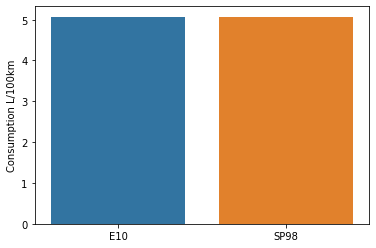

In [43]:
fig, ax = plt.subplots()
sns.barplot(x = ['E10','SP98'],y= df_exp[['E10_consum_pred', 'SP98_consum_pred']].mean().values)

plt.ylabel('Consumption L/100km') #To remove countries 

In [46]:
ratio = 1.00
df_exp['E10_high'] = df_exp.apply(lambda x: 0 if (x.E10_consum_pred / x.SP98_consum_pred)/ratio <1 else 1, axis=1)

In [47]:
df_exp.E10_high.value_counts()

1    5654
0    4346
Name: E10_high, dtype: int64

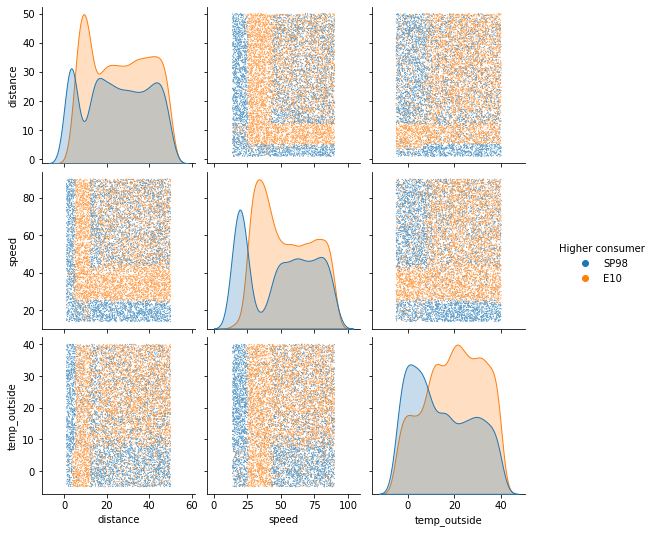

In [89]:
g = sns.pairplot(df_exp[['distance', 'speed','temp_outside','E10_high']], hue= 'E10_high', plot_kws={'s':1})
g._legend.set_title('Higher consumer')
new_labels = ['SP98', 'E10']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    
g._legend.set_bbox_to_anchor((1.1, 0.5))

plt.savefig('../img/pairplot_consum',bbox_inches='tight',pad_inches=0.2)
plt.show()


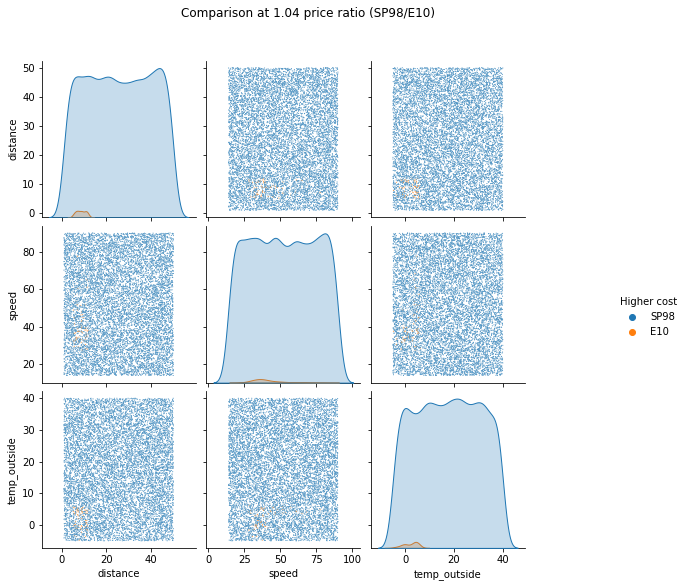

In [121]:
ratio = 1.04
df_exp['E10_high_price'] = df_exp.apply(lambda x: 0 if (x.E10_consum_pred / x.SP98_consum_pred)/ratio <1 else 1, axis=1)
g = sns.pairplot(df_exp[['distance', 'speed','temp_outside','E10_high_price']], hue= 'E10_high_price', plot_kws={'s':1})
g._legend.set_title('Higher cost')
new_labels = ['SP98', 'E10']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    
g._legend.set_bbox_to_anchor((1.1, 0.5))

g.fig.suptitle("Comparison at 1.04 price ratio (SP98/E10)", y=1.08) # y= some height>1


plt.savefig('../img/pairplot_1_04',bbox_inches='tight',pad_inches=0.2)
plt.show()

In [61]:
df_prices = pd.read_pickle('../data/prices')

In [66]:
df_95 = df_prices[(df_prices.gas_type == 'Sin plomo 95')].drop('gas_type', axis=1)
df_98 = df_prices[(df_prices.gas_type == 'Sin plomo 98')].drop('gas_type', axis=1)

In [70]:
df_prices_merge = df_95.merge(df_98, how='inner', on=['name', 'direction']).rename(columns={'price_x': 'price_E10', 'price_y':'price_SP98'})

In [76]:
df_prices_merge

,name,direction,price_E10,price_SP98
0,Gasolinera SHELL en MADRID (MADRID)CALLE SANTO...,"CALLE SANTO DOMINGO, 10","1,339","1,479"
1,Gasolinera PETROLANDIA en MADRID (MADRID)CR M-...,"CR M-607, 11,7","1,256","1,400"
2,Gasolinera GALP en MADRID (MADRID)AVENIDA DE L...,"AVENIDA DE LOS POBLADOS, SN","1,319","1,444"
3,Gasolinera CEPSA en MADRID (MADRID)AVENIDA DE ...,"AVENIDA DE LOS POBLADOS, 18","1,329","1,444"
4,Gasolinera REPSOL en MADRID (MADRID)CL ARTURO ...,"CL ARTURO SORIA, 175","1,339","1,489"
...,...,...,...,...
135,Gasolinera SHELL ATALAYUELA 365 en MADRID (MAD...,"CALLE GUADALCANAL, 36","1,169","1,349"
136,Gasolinera BP SAN PEDRO MD en MADRID (MADRID)C...,"CR A-3 MG IZDO, KM 11,2 km 11,200","1,279","1,421"
137,Gasolinera SHELL en MADRID (MADRID)CALLE CARDE...,"CALLE CARDENAL HERRERA ORIA, 81","1,339","1,479"
138,Gasolinera Q8 en MADRID (MADRID)AVENIDA ALBUFE...,"AVENIDA ALBUFERA, 89","1,315","1,425"


In [77]:
df_prices_merge['price_E10'] = df_prices_merge['price_E10'].str.replace(',', '').astype(float)
df_prices_merge['price_SP98'] = df_prices_merge['price_SP98'].str.replace(',', '').astype(float)

In [78]:
df_prices_merge['ratio98_95'] = df_prices_merge.price_SP98.astype(float) / df_prices_merge.price_E10.astype(float)

In [80]:
df_prices_merge.ratio98_95.describe()

count    140.000000
mean       1.103848
std        0.015831
min        1.053888
25%        1.094717
50%        1.106847
75%        1.112024
max        1.153978
Name: ratio98_95, dtype: float64

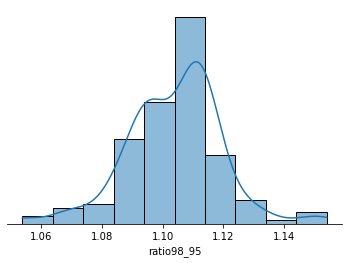

In [105]:
fig, ax = plt.subplots()
g = sns.histplot(x= df_prices_merge.ratio98_95, kde=True, bins=10)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
g.axes.get_yaxis().set_ticks([])
ax.set_ylabel('')
plt.savefig('../img/ratio_dist',bbox_inches='tight',pad_inches=0.2)
plt.show()

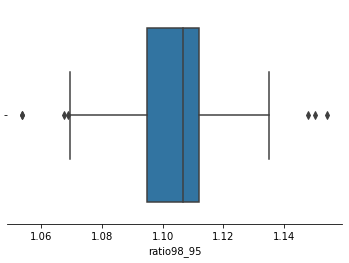

In [110]:
fig, ax = plt.subplots()
g = sns.boxplot(x= df_prices_merge.ratio98_95)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('../img/ratio_box',bbox_inches='tight',pad_inches=0.2)